In [2]:
!python --version

Python 3.8.3


In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.4.1'

In [15]:
!pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=8a8fd0e7ead264ef8d09dd5eec38848ec60968580372abef69e0e0f352a97534
  Stored in directory: /Users/jaeyoungshin/Library/Caches/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [4]:
# Reviews.csv 파일을 data라는 이름의 데이터프레임에 저장. 단, 10만개의 행(rows)으로 제한.
data = pd.read_csv("Reviews.csv", nrows = 100000)
print('전체 리뷰 개수 :',(len(data)))

전체 리뷰 개수 : 100000


In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.sample(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
3582,3583,B004MDQSDO,A1RTSF9U66MGQZ,skatelady,0,0,5,1346976000,reminds me of Italy,"I rarely eat anything but whole wheat pasta, b..."
60498,60499,B003QNJYXM,A2LMG0H5Y74VA4,dmbfan285,0,0,5,1347321600,5-hour ENERGY Highly Recommend!,I absolutely love 5-hour ENERGY! I use it afte...
53227,53228,B0078TRYIW,A2O4F58PVTK1MX,"hachimachi ""alex""",0,0,5,1244332800,supreme chocolate,"this chocolate is a true treat to eat, perfect..."
21333,21334,B002QWP89S,A1XEHQJ0UHJ18E,Bismarck,0,0,5,1314489600,Excellent Teeth Cleaner,Greenies are very muched loved as a tatsy Trea...
3885,3886,B005GX7GVW,AS1FCKNKY95ID,"Juli A. Lee ""JingleJL""",1,1,5,1336953600,Great and good price!,I love these noodles. They are really great f...
51521,51522,B004HOLD92,AONR0F6J1F3XO,"Officer Weigel ""Trudy""",0,0,5,1247356800,"Delicious, just like Salt and Vinegar Chips!",These are great! As a lover of all chips I'm s...
84261,84262,B000FYVKRS,A28B88PTXY63AT,William B. Trent,0,0,5,1338249600,"Great snack, great value",Like other customers I divide these into handf...
10685,10686,B00389Q4XW,A3BLP7LRNCAT2Y,"Liliana ""maccentris""",1,1,1,1304467200,"It's ok, but certainly not worth the cost",I recommend this instead for the same price: <...
59948,59949,B00099XOQO,A2K3GLORAL0WOM,Kathie,0,0,3,1322006400,Knorr's beef noodles,"The noodles were all very broken, but the tast..."
41032,41033,B002L8XM86,AYF6DQ36U6C25,Natacha,1,2,1,1338854400,HORRIBLE INGREDIENTS,"Despite claiming they use the ""finest ingredie..."


In [7]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [8]:
# text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플수 :", len(data))

전체 샘플수 : 88426


In [9]:
# Null 값을 가진 샘플 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88421


In [10]:
# 전처리 함수 내 사용
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaeyoungshin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'there', 'some', 'very', 'him', 'off', 'mightn', 've', 'how', 'or', 'me', 'against', 'aren', 'haven', "needn't", "aren't", 'we', 'out', 'is', 'on', 're', "didn't", "you're", 'themselves', 'which', 'this', 'a', 'himself', 'about', 'again', 'most', 'did', "hadn't", 'she', 'can', 'our', "mightn't", 'not', 'yourselves', 'so', 'an', 'they', "mustn't", 'are', 'their', 'before', 'o', 'why', "wasn't", 'while', 'these', 'by', 'hers', 'it', 'during', 's', 'does', 'then', 'shan', 'hadn', 'below', 'doing', 'all', 'its', 'down', 'after', 'at', 'having', "shan't", 'both', 'didn', 'my', 'couldn', 'for', "should've", 'll', 'ours', 'once', 'being', 'ain', 'what', "wouldn't", 'because', 'each', 'isn', 'wasn', "weren't", 'theirs', 'no', 'should', "haven't", "you'd", 'through', 'm', 'herself', 'few', 'have', "couldn't", 'too', 'y', "won't", 'be', 'wouldn', 'any', "don't", "you've", 'had', 'further', 'who', 'd', 'from', 'been', 'same', 'but', 'mustn', 'shouldn', 'into', 'needn', 'over', "isn'

In [13]:
# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my husband (and myself) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [14]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [15]:
# Text 열 전처리
clean_text = []
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [16]:
# Summary 열 전처리
clean_summary = []
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

/Users/jaeyoungshin/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:278: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [17]:
# 길이가 공백인 샘플은 NULL 값으로 변환
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [18]:
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88421


텍스트의 최소 길이 : 6
텍스트의 최대 길이 : 2520
텍스트의 평균 길이 : 81.4805871908257
요약의 최소 길이 : 1
요약의 최대 길이 : 31
요약의 평균 길이 : 4.141900679702785


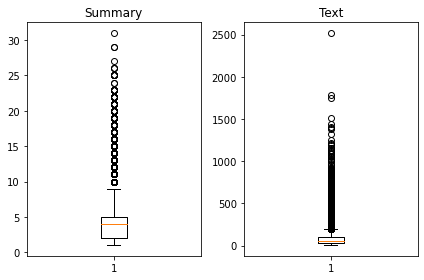

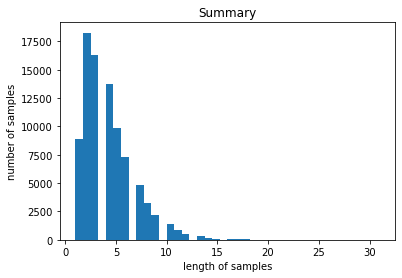

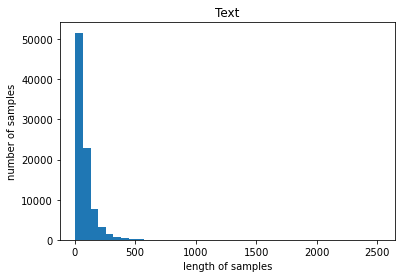

In [19]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
text_max_len = 50
summary_max_len = 8

In [21]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt += 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [22]:
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9326404360954976


In [23]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 37065


In [24]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [25]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,decoder_input,decoder_target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,sostoken Good Quality Dog Food,Good Quality Dog Food eostoken
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,sostoken Not as Advertised,Not as Advertised eostoken
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,sostoken Cough Medicine,Cough Medicine eostoken
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,sostoken Great taffy,Great taffy eostoken
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,sostoken Great! Just as good as the expensive...,Great! Just as good as the expensive brands! ...


In [26]:
encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [27]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[ 8823 19775 10690 ... 18853 26023  1298]


In [28]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [29]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 7413


In [30]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [31]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 29652
훈련 레이블의 개수 : 29652
테스트 데이터의 개수 : 7413
테스트 레이블의 개수 : 7413


In [32]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [33]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 20964
등장 빈도가 6번 이하인 희귀 단어의 수: 15937
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5027
단어 집합에서 희귀 단어의 비율: 76.02079755771798
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9660166649343807


In [34]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [35]:
print(encoder_input_train[:3])

[[80, 19, 13, 605, 16, 65, 431, 7, 226, 97, 26, 1563, 45, 4, 460, 48, 19, 378, 12, 1, 238, 153, 2254, 14, 788, 8, 4, 1370, 7014, 135, 7, 182, 26, 138, 148, 21, 54, 106, 3, 323, 4, 3852, 2, 60, 59, 2, 176, 227, 26], [115, 257, 88, 347, 24, 2, 21, 343, 7, 67, 17, 2390, 1, 2390, 66, 12, 128, 782, 3, 13, 78, 86, 4, 67, 2, 198, 406, 42, 294, 339, 6094, 153, 606], [2, 18, 63, 715, 225, 197, 13, 17, 493, 66, 16, 2741, 1639, 2196, 348, 12, 77, 9, 26, 2052, 699, 2592, 3, 3853, 3109, 23, 18, 39, 1, 2011, 3854, 4654, 86, 366, 9, 666, 887, 432, 416]]


In [36]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [37]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt += 1
        rare_freq += value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7956
등장 빈도가 5번 이하인 희귀 단어의 수: 6381
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 1575
단어 집합에서 희귀 단어의 비율: 80.20361990950227
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.481167630890367


In [38]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [39]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [40]:
print(decoder_input_train[:5])

[[1, 133, 7, 12, 4, 30], [1, 564, 1577, 339, 24, 610], [1, 134, 120, 1578, 115], [1, 757, 546, 33, 5, 138, 348], [1, 45, 60, 12, 79, 274]]


In [41]:
print(decoder_target_train[:5])

[[133, 7, 12, 4, 30, 2], [564, 1577, 339, 24, 610, 2], [134, 120, 1578, 115, 2], [757, 546, 33, 5, 138, 348, 2], [45, 60, 12, 79, 274, 2]]


In [42]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [43]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 828
삭제할 테스트 데이터의 개수 : 220


In [44]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 28824
훈련 레이블의 개수 : 28824
테스트 데이터의 개수 : 7193
테스트 레이블의 개수 : 7193


In [45]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

In [46]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [47]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [48]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [49]:
# # 디코더의 출력층
# decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
# decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# # 모델 정의
# model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
# model.summary()

In [50]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [51]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [52]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [53]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
113/113 [==============================] - 194s 2s/step - loss: 3.2778 - val_loss: 2.3512
Epoch 2/50
113/113 [==============================] - 183s 2s/step - loss: 2.3432 - val_loss: 2.2651
Epoch 3/50
113/113 [==============================] - 184s 2s/step - loss: 2.2890 - val_loss: 2.1775
Epoch 4/50
113/113 [==============================] - 183s 2s/step - loss: 2.1898 - val_loss: 2.1074
Epoch 5/50
113/113 [==============================] - 182s 2s/step - loss: 2.1077 - val_loss: 2.0764
Epoch 6/50
113/113 [==============================] - 180s 2s/step - loss: 2.0422 - val_loss: 2.0066
Epoch 7/50
113/113 [==============================] - 182s 2s/step - loss: 1.9759 - val_loss: 1.9582
Epoch 8/50
113/113 [==============================] - 178s 2s/step - loss: 1.9160 - val_loss: 1.9302
Epoch 9/50
113/113 [==============================] - 179s 2s/step - loss: 1.8644 - val_loss: 1.9146
Epoch 10/50
113/113 [==============================] - 177s 2s/step - loss: 1.8243 - val_lo

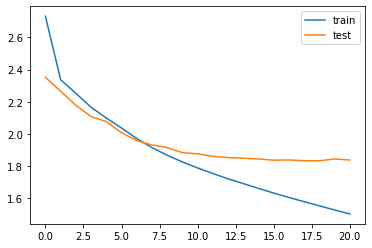

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [55]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [56]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [57]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [58]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [59]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트
        e_h, e_c = h, c

    return decoded_sentence

In [60]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [63]:
for i in range(500, 1000):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  everyone at work loves lifesavers whether you crunch or suck on them all except the green and come on lifesavers bring out a grape blackberry only bag 
실제 요약문 : lifesavers 
예측 요약문 :  great


원문 :  while not organic cinnamon is the best tasting cinnamon in my opinion with much more robust flavor than other i like that this spice cinnamon is gluten free too 
실제 요약문 : my favorite cinnamon 
예측 요약문 :  great tasting


원문 :  i used to love bars the words are used to the natural leaves a bad taste in my mouth intended i sure wish they'd return to their original recipe 
실제 요약문 : bad change 
예측 요약문 :  not bad


원문 :  picked up these pop tarts and i have to say they are the best pop tarts i have ever tasted even the kids love them 
실제 요약문 : best pop tarts ever 
예측 요약문 :  love these


원문 :  when i moved to chicago from north carolina i discovered that grocery stores do not carry john i searched for it on amazon on a whim and was surprised to discover that it was available for prime even orde

예측 요약문 :  great cereal


원문 :  i got the item very quickly in about 2 days i was to recieve it so quickly as soon as i opened it my disappeared the plant was dying and leaves were falling off very disappointed 
실제 요약문 : quickly but was in awful 
예측 요약문 :  terrible


원문 :  i had to write a review on this tea the bag is huge when you open it wonderful soothing smells then i brewed it and tastes really nice i recommend the tea it will last a really long time good job 
실제 요약문 : wow this smells and tastes wonderful 
예측 요약문 :  not a good tea


원문 :  i was disappointed with all the generic looking sugar sprinkles at the grocers so i found these online with amazon it was worth the trouble these are very distinctive with the mini sugar hearts with the large sized container you won't run out after your first batch highly recommended 
실제 요약문 : sprinkles for baking 
예측 요약문 :  not what i expected


원문 :  everything was perfect except the fact that the chocolate was a little when i received it but w

예측 요약문 :  great


원문 :  this transaction was perfect and the peppers were in great packaging they were dehydrated nicely so not only can the peppers be used but the seeds be sprouted to grow your own 
실제 요약문 : peppers 
예측 요약문 :  great


원문 :  i typically get these bars at race but ran out and needed some to take on a trip they were a great price delivered on time i really love this product 
실제 요약문 : bars 
예측 요약문 :  great snack


원문 :  this is really good popcorn it pops up nice and fluffy and has much more of a taste to it than the store brand white popcorn i was using 
실제 요약문 : really good 
예측 요약문 :  great popcorn


원문 :  i was so surprised how wonderful these brownies taste they are definitely superior to the standard wheat version i also cut and freeze them and they are still great it is nice to know gluten free can beat mainstream mixes on taste 
실제 요약문 : best brownie ever 
예측 요약문 :  best gf mix


원문 :  i have enjoyed this product very much and the price is great and the delivery i

예측 요약문 :  great flavor


원문 :  57 for 12 cans of starbucks doubleshot is not only insane but it's to consumers amazon get a and remove products that are so priced 
실제 요약문 : great product price 
예측 요약문 :  coffee


원문 :  the toddler health formula is wonderful it is difficult to have to wait for it on the waiting list and takes awhile to ship but is worth it 
실제 요약문 : toddler health 
예측 요약문 :  great product


원문 :  i used to live in cincinnati and i was excited to taste that cincinnati skyline chili again this is not it it was not a bad taste but it was not what i was expecting i would not recommend this for anyone who knows cincinnati chili 
실제 요약문 : not 
예측 요약문 :  not as good as i remember


원문 :  this is the single hottest thing i've ever the flavor wasn't very appealing though if you like it hot fine but if you like it hot this stuff is for you 
실제 요약문 : liquid 
예측 요약문 :  not what i expected


원문 :  used to subscribe to this item as my dogs loved them but i just found that they are m

예측 요약문 :  great for the go


원문 :  tastes just like restaurant red curry but me and my wife needed 3 packets to make enough curry for us boxes are alot smaller than we thought i give 4 stars for taste and 3 stars for the amount 
실제 요약문 : good taste but little amount of curry 
예측 요약문 :  good product


원문 :  i'm on no wheat dairy or sugar diet restrictions and this is my treat that i really look forward to sometimes every day thank you nana's and the price is great from amazon 
실제 요약문 : i love these cookies 
예측 요약문 :  great for kids


원문 :  this is my favorite tea of all time i drink many different varieties including teavana and other loose leaf gourmet teas and teabags and this one is still my favorite it is great to drink all year and not just during the holidays 
실제 요약문 : the best tea ever 
예측 요약문 :  great tea


원문 :  i was expecting a bit better after reading other reviews this is about the same as any other hot chocolate made with water i prefer making it with milk as the flavor an

예측 요약문 :  not what i wanted


원문 :  this by far the best pudding mix you don't see this on the store shelves everyone seems to just buy milk chocolate pudding and i guess most don't like to cook pudding on the stove it is best when pudding is cooked cooked instant pudding does not equal this 
실제 요약문 : great dessert 
예측 요약문 :  best gluten free bread mix


원문 :  chocolate raspberries strawberries and organic to boot what's not to like okay the package is too small this is awesome stuff i love it 
실제 요약문 : oh this is good 
예측 요약문 :  not what i expected


원문 :  this is a must have in my home i use olive oil for everything my skin hair cooking taking off this is great quality organic virgin olive oil and i'm in heaven 
실제 요약문 : great size great product and great price 
예측 요약문 :  great product


원문 :  moderately flavorful with no trace of bitterness low acidity nice aroma i had to use significantly more per pot than the package but that is usually the case with my cuisinart drip coffee maker

예측 요약문 :  great taste


원문 :  we had samu at our last party in my and it was an amazing drink it was an amazing mixer for vodka and rum and was really for my the next morning i highly recommend samu every one in my is already hooked 
실제 요약문 : a great party drink 
예측 요약문 :  delicious


원문 :  by the time i buy a few four packs and get amazons free shipping to my door it is a better deal than my local store its a wonderful cookie that holds up well in shipping try it for 
실제 요약문 : orange lt my favorite 
예측 요약문 :  great for on the go


원문 :  i have tried most of the blue diamond almond flavors and i have to say this one is my favorite once i start eating these almonds it's hard to stop yummy 
실제 요약문 : best blue diamond almonds 
예측 요약문 :  great


원문 :  great for iced tea same tea used at starbucks for their iced green tea 
실제 요약문 : love this tea 
예측 요약문 :  great tea


원문 :  i love the taste of this water it and you after one glass subscribe for the delivery and you will have your own minera

예측 요약문 :  great


원문 :  i think this is the best licorice because it is soft natural and fresh i have tried them all and this is number one in my book 
실제 요약문 : are great 
예측 요약문 :  great popcorn


원문 :  simply put its the cheapest you can get gummy bears for i have ordered 6 different times from same location br p d 
실제 요약문 : to 
예측 요약문 :  great chips


원문 :  pop chips are the best chips i've had that are low calorie the originals are my favorite but the sea salt and vinegar are very very good also 
실제 요약문 : great chips 
예측 요약문 :  great chips


원문 :  my son really enjoys earth's best lentil he eats the entire jar for dinner and always wants more the product shipped very quickly 
실제 요약문 : my son loves it 
예측 요약문 :  great


원문 :  love it taste like the old days at the show when i was a boy 
실제 요약문 : i really like the taste great product 
예측 요약문 :  good stuff


원문 :  this tastes the way i remember caramel popcorn tasting highly recommend this for old fashioned caramel corn fans it's actu

예측 요약문 :  good but not a great price


원문 :  herbal additives in this blend destroy real tea taste it is only for people who like herbal taste i don't 
실제 요약문 : not a real tea 
예측 요약문 :  great tea


원문 :  we like these sugar free licorice candies they are small and strong with good flavor small box fits in your pocket or purse easily 
실제 요약문 : licorice 
예측 요약문 :  great


원문 :  even after shaking the cup and only using 6 ounces of water this hot cocoa pretty sure there's not a lick of real chocolate in it still tastes horrible 
실제 요약문 : these are horrible 
예측 요약문 :  good flavor


원문 :  i am a bit disappointed the flavor was not what i wanted or expected 
실제 요약문 : bread 
예측 요약문 :  not bad


원문 :  these almonds tasted awful i would have returned them or tried to get a replacement but could not find that option they tasted like they were past the fresh date maybe the squirrels will eat them 
실제 요약문 : past 
예측 요약문 :  not bad


원문 :  the dark chocolates were great and the packaging was great

예측 요약문 :  best cookies ever


원문 :  i got just what i paid for no complaints i will be buying more for my food storage light and easily stored so perfect for that 
실제 요약문 : as good as advertised 
예측 요약문 :  great product


원문 :  i trust this brand the flavors are blended just right and i love that many include stevia no need to add sweetener 
실제 요약문 : always the right formula 
예측 요약문 :  great


원문 :  this type of a is a really good item it takes much less power than a standard and puts out much more light than a regular of the same size it will also last longer than a regular the price for these was reasonable 
실제 요약문 : quite good 
예측 요약문 :  good but not great


원문 :  i like the bigelow earl grey k cup over the other brands of earl grey k cup for its flavor there is a stronger but not overpowering flavor in the bigelow lovely blend 
실제 요약문 : smooth tasty 
예측 요약문 :  great tea


원문 :  i was at a walmart in south carolina and just picked some up i was traveling and it helped me unwind 
실제 

예측 요약문 :  great product


원문 :  this tea is awesome i even got my husband to drink it every night before bed unfortunately our local grocery stores aren't carrying the mint flavor anymore so going to order it here well worth the price thanks amazon 
실제 요약문 : great flavor 
예측 요약문 :  great tea


원문 :  we original zico but now its taste totally different br when introduced it was pure coconut water which was just pasteurized now it says its from concentrate br br taste little different now 
실제 요약문 : product changed 
예측 요약문 :  not good


원문 :  i love this flavor it is the same price as walmart but this is easier plus you get 72 hard to find 72 at walmart all one flavor 
실제 요약문 : yummy 
예측 요약문 :  good product


원문 :  this was very tasty tea and the company had great customer service their product is very healthy and i'd recommend it to anyone 
실제 요약문 : great company great product 
예측 요약문 :  great tea


원문 :  i'm not sure i like pepperoni in the bites size my dogs love them they sure smell b

예측 요약문 :  great product


원문 :  our 8 yr old with celiac loves this cracker great with soup or for pb j 
실제 요약문 : great gf cracker 
예측 요약문 :  great


원문 :  i like this candy very much and purchase it on a regular basis to keep in the candy dish on my desk it is well like by everyone some people return to my office for a visit just to take a few thank you 
실제 요약문 : greek candy 
예측 요약문 :  good but pricey


원문 :  everyone of the cans were severely dented and all of the dented sides were carefully placed so could not see them the cans were shrink wrapped and packed in plastic air bags there was no damage to the box they arrived in so they were dented when packed 
실제 요약문 : false advertising 
예측 요약문 :  dented


원문 :  this is my favorite gourmet mustard it's a perfect recipe addition and condiment i buy it as a gift all of the time 
실제 요약문 : my favorite gourmet mustard 
예측 요약문 :  great product


원문 :  i wanted to like this wine because i really like but the wine just isn't good it really tast

예측 요약문 :  great for dog


원문 :  i won't say watery but much thinner than every other honey i have ever eaten good news no waiting for honey to travel to top of jar it just runs right out 
실제 요약문 : very thin honey 
예측 요약문 :  great


원문 :  this is a great product i have no idea why the company has discontinued it we have a shi tzu and it works great for her i've tried other products but they are mushy and extremely bland she likes this and it doesn't get her dirty 
실제 요약문 : vegetarian formula 
예측 요약문 :  great product


원문 :  the tea is good for non steeped but my last order had several pods with loose foil tops which means it in the keurig and tea out dispenser 
실제 요약문 : order 
예측 요약문 :  great tea


원문 :  got these for my husband who loves a bold coffee flavor he said they were terrific and he really enjoyed them the pods look a little strange but they work perfect 
실제 요약문 : great cup of coffee 
예측 요약문 :  great coffee


원문 :  i hope that kelloggs stops trying to save 01 cent by using hig

예측 요약문 :  great coffee


원문 :  i just bought five of these of gatorade for 30 00 total at sam's club don't waste your money buying this here 
실제 요약문 : too expensive 
예측 요약문 :  not bad


원문 :  the best coffee ever not always easy to find in local stores but i can always get it on amazon 
실제 요약문 : donut house coffee chocolate glazed 
예측 요약문 :  great coffee


원문 :  these are the only treats i can get my dog to eat she has to be limited as she will make a meal on these if i would let her 
실제 요약문 : teenie greenies 
예측 요약문 :  great for training


원문 :  i have never ever tasted a finer and more delicious chocolate in my entire life the only thing i would ask leonidas belgian chocolates to do is make up some chocolates with whole almonds in them that would be the best of both worlds 
실제 요약문 : there is none better 
예측 요약문 :  delicious


원문 :  tried this sauce first at our favorite place to eat out was very happy to be able to order some for our home cooking great spicy hot and sweet 
실제 요약문 : g

In [12]:
decode_sequence("i used to love bars the words are used to the natural leaves a bad taste in my mouth intended i sure wish they'd return to their original recipe ")

NameError: name 'decode_sequence' is not defined